In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [121]:
df=pd.read_csv('Mall Dataset.csv')

In [122]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# ***data exploring***

In [123]:
df.info()# no missing values, genre is object type to encode if necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [124]:
df.describe() # values are with diffrent scale, and we have outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [125]:
#searching for duplicates
df.duplicated().any() # no duplicates

False

# ***our scope is clustering so we can use pair plots that shows as the possible combinations of variables that shows the most distinguishable clusters/groups for that we may label encode genre***

In [126]:
#Encoding 'Genre'

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [129]:
l_enc=LabelEncoder()

In [130]:
df.Genre=l_enc.fit_transform(df.Genre)

In [131]:
l_enc.classes_

array(['Female', 'Male'], dtype=object)

In [132]:
df.Genre.value_counts() #1 is for male and 0 for female

0    112
1     88
Name: Genre, dtype: int64

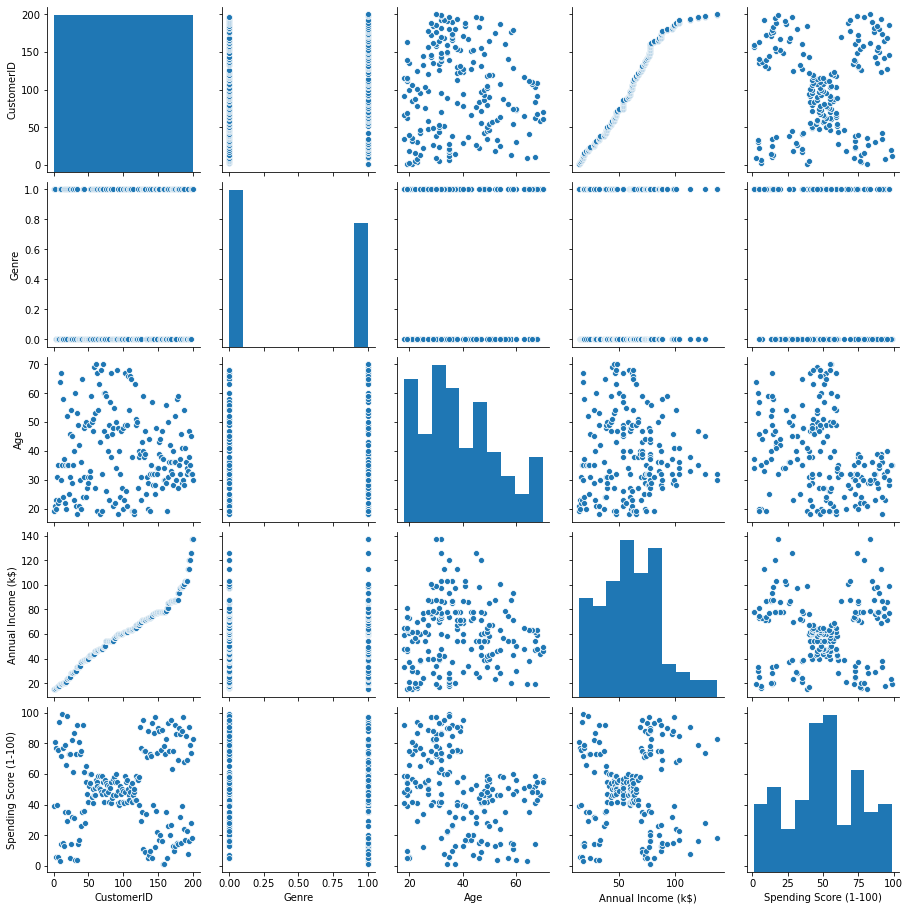

In [133]:
sns.pairplot(df)

# ***Hierarchical  Clustering (Aglomerative and divisive) Analysis***

## spending score vs  annual income  clustering

In [134]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [135]:
df1=df[['Annual Income (k$)','Spending Score (1-100)']]

In [136]:
df1.shape

(200, 2)

***Dendrograms***

In [137]:
from scipy.cluster.hierarchy import dendrogram,linkage

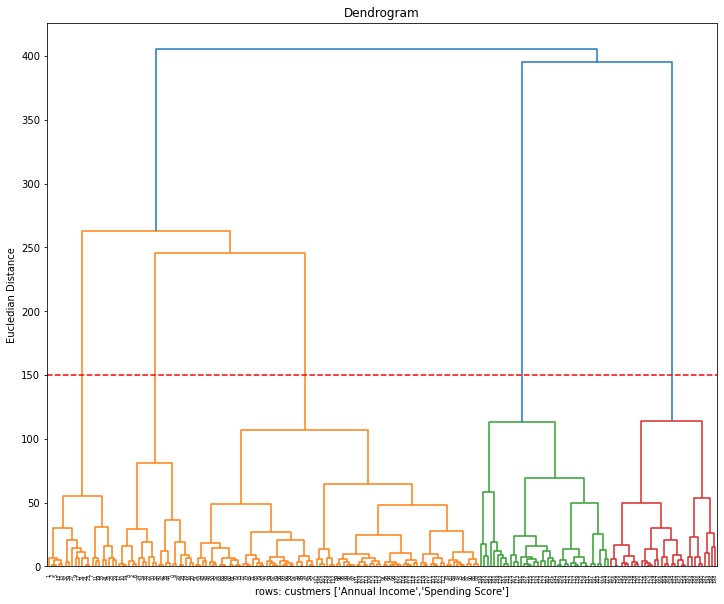

In [138]:
plt.figure(figsize=(12,10))
dendro=dendrogram(linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.xlabel("rows: custmers ['Annual Income','Spending Score']")
plt.ylabel('Eucledian Distance')
#manually shoing the best clustering step: we start by the maximum vertical eucledian distance to start from it a horizontal line that must cross the second longest vertical line(eucledian distance)
plt.axhline(y=150,color='r',linestyle='--')

In [139]:
#linkage matrix shoing mutual eucledian distances according to 'ward' method
linkage(df1,method='ward')

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 21.        ,  23.        ,   1.        ,   2.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 74.        ,  85.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 75.        ,  81.        ,   1.        ,   2.        ],
       [ 92.        ,  97.        ,   1.        ,   2.        ],
       [101.        , 109.        ,   1.        ,   2.        ],
       [107.        , 113

***we can try it for only 10 rows (points of custmers)***

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [14.375, 14.375, 71.25, 71.25]],
 'dcoord': [[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 5.477225575051661, 5.477225575051661, 1.4142135623730951],
  [0.0, 8.215838362577491, 8.215838362577491, 5.477225575051661],
  [0.0, 22.192341021172144, 22.192341021172144, 8.215838362577491],
  [0.0, 2.23606797749979, 2.23606797749979, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 4.163331998932265, 4.163331998932265, 2.0],
  [2.23606797749979, 53.50950071404766, 53.50950071404766, 4.163331998932265],
  [22.192341021172144,
   136.8473602229871,
   136.8473602229871,
   53.50950071404766]],
 'ivl': ['7', '9', '1', '3', '5', '0', '4', '8', '2', '6'],
 'leaves': [7, 9, 1, 3, 5, 0, 4, 8, 2, 6],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C0

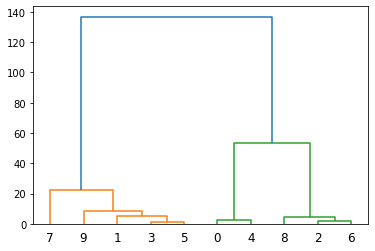

In [109]:
#dendrogram with ward's method
dendrogram(linkage(df1.iloc[:10],method='ward'))

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [40.0, 40.0, 64.375, 64.375],
  [12.5, 12.5, 52.1875, 52.1875]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 2.0],
  [0.0, 2.23606797749979, 2.23606797749979, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 4.123105625617661, 4.123105625617661, 1.4142135623730951],
  [0.0, 4.47213595499958, 4.47213595499958, 4.123105625617661],
  [0.0, 13.341664064126334, 13.341664064126334, 4.47213595499958],
  [2.23606797749979, 32.0624390837628, 32.0624390837628, 13.341664064126334],
  [3.1622776601683795,
   33.015148038438355,
   33.015148038438355,
   32.0624390837628]],
 'ivl': ['8', '2', '6', '0', '4', '7', '9', '1', '3', '5'],
 'leaves': [8, 2, 6, 0, 4, 7, 9, 1, 3, 5],
 'color_list': ['C1', 'C1', 'C2', 'C3', 'C3', 'C3', 'C3', 'C0', 

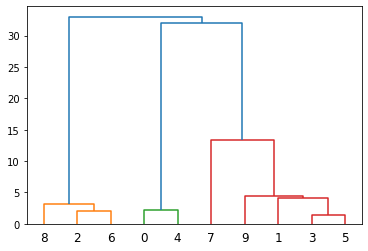

In [110]:
#dendrogram with single's method
dendrogram(linkage(df1.iloc[:10],method='single'))

## Aglomerative hierarchical Algorithm

In [111]:
from sklearn.cluster import AgglomerativeClustering

In [112]:
#n_clusters=5 as from the dendriogram
clust=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [113]:
Segments=clust.fit_predict(df1)
Segments

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Text(0, 0.5, 'Spending Score (1-100)')

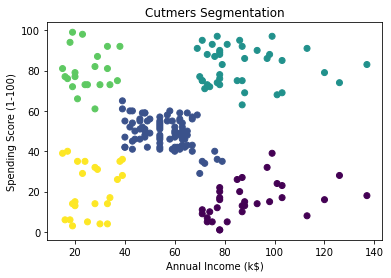

In [114]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],c=clust.labels_)
plt.title('Cutmers Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## Defining Custmers Segments Accordingly

In [173]:
df1[[0,2,0,4]]

array([[15, 39],
       [16,  6],
       [15, 39],
       [17, 40]], dtype=int64)

In [153]:
df1=np.array(df1)
#or df1=df1.to_numpy

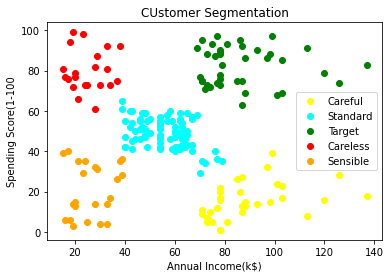

In [178]:
#plt.scatter(df1[Segments==1,0],df1[Segments==0,1])
plt.scatter(df1[Segments == 0, 0], df1[Segments == 0, 1], c = 'yellow', label = 'Careful')# where Segments==0 is a point(x,y) so ,0 for x and ,1 for y
plt.scatter(df1[Segments == 1, 0], df1[Segments == 1, 1], c = 'cyan', label = 'Standard')
plt.scatter(df1[Segments == 2, 0], df1[Segments == 2, 1],  c = 'green', label = 'Target')
plt.scatter(df1[Segments == 3, 0], df1[Segments == 3, 1] , c = 'red', label = 'Careless')
plt.scatter(df1[Segments == 4, 0], df1[Segments == 4, 1], c = 'orange', label = 'Sensible')

plt.title('CUstomer Segmentation')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()

In [ ]:
plt.scatter()